In [1]:
#!pip install numpy pandas matplotlib seaborn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("final_dataset.csv")

In [20]:
print("Data Overview")
display(df.head())
print("\nInfo:")
df.info()

Data Overview


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [21]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [22]:
df["Full_Date"] = pd.to_datetime(df[["Year", "Month", "Date"]].rename(columns={"Date": "day"}))
df = df[["Full_Date", "Holidays_Count", "Days", "PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]]
df["AQI"] = df["AQI"].replace(0, np.nan)

In [23]:
df["Weekday"] = df["Full_Date"].dt.day_name()
df["IsWeekend"] = df["Weekday"].isin(["Saturday", "Sunday"]).astype(int)

In [24]:
bins = [0, 50, 100, 200, 300, 400, 500]
labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
df["AQI_Category"] = pd.cut(df["AQI"], bins=bins, labels=labels)

In [25]:
df["PM2.5_PM10_Ratio"] = df["PM2.5"]/(df["PM10"] + 1e-5)
df["NO2_SO2_Ratio"] = df["NO2"]/(df["SO2"] + 1e-5)

In [26]:
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_20548\3152322294.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [27]:
df.to_csv("clearnedData.csv", index=False)
print("Cleaned dataset saved as cleanedData.csv")

Cleaned dataset saved as cleanedData.csv


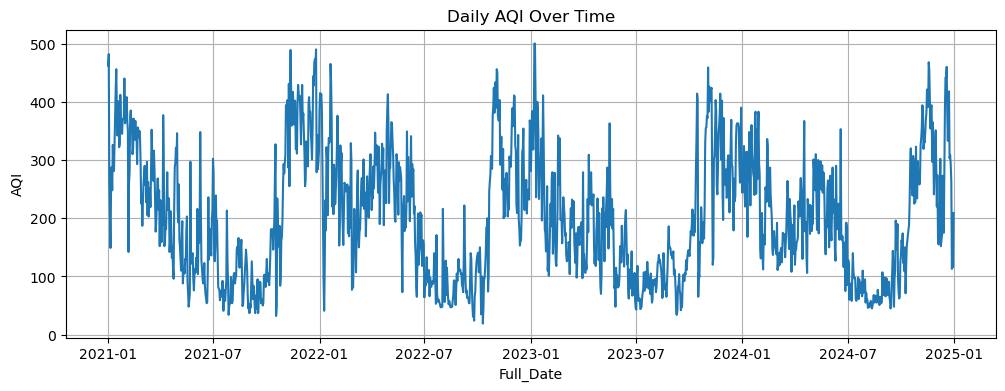

In [28]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="Full_Date", y="AQI")
plt.title("Daily AQI Over Time")
plt.ylabel("AQI")
plt.grid(True)
plt.show()